In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
jobdata = pd.read_csv("reallyCleanData.csv")
jobdata

,job_id,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,...,required_education,industry,function,fraudulent,country,state,city,minSalary,maxSalary,haveSalary
0,1,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Unspecified,0,1,...,Unspecified,Unspecified,Marketing,0,US,NY,New York,0,0,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,...,Unspecified,Marketing and Advertising,Customer Service,0,NZ,Unspecified,Auckland,0,0,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unspecified,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Unspecified,0,1,...,Unspecified,Unspecified,Unspecified,0,US,IA,Wever,0,0,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,...,Bachelor's Degree,Computer Software,Sales,0,US,DC,Washington,0,0,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Unspecified,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,...,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,FL,Fort Worth,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,...,Unspecified,Computer Software,Sales,0,CA,ON,Toronto,0,0,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,...,Bachelor's Degree,Internet,Accounting/Auditing,0,US,PA,Philadelphia,0,0,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",Unspecified,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,Unspecified,0,0,...,Unspecified,Unspecified,Unspecified,0,US,TX,Houston,0,0,0
17878,17879,Graphic Designer,"NG, LA, Lagos",Unspecified,Unspecified,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,...,Professional,Graphic Design,Design,0,NG,LA,Lagos,0,0,0


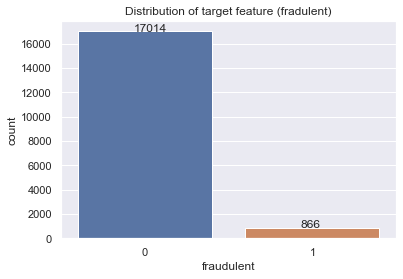

In [3]:
plt.figure(figsize=(6, 4))
ax = sb.countplot(x = "fraudulent", data = jobdata)
plt.title("Distribution of target feature (fradulent)")
for p in ax.patches: #count of each
    ax.annotate(p.get_height(), (p.get_x()+0.33, p.get_height()))
plt.show()

Data is imbalanced

Text(0.5, 0.98, 'Distributions of minSalary and maxSalary')

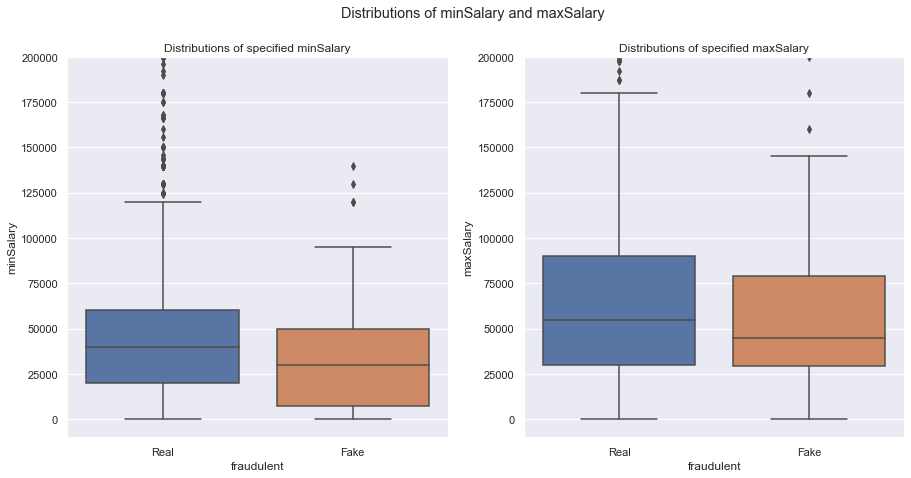

In [4]:
salaryRange = pd.DataFrame(jobdata[["minSalary","maxSalary"]])

fig, axes = plt.subplots(1, 2, figsize=(15,7))
count = 0
for value in salaryRange:
    sb.boxplot(y=jobdata[value], x='fraudulent', data=jobdata[jobdata.haveSalary == 1], ax=axes[count])
    axes[count].set_ylim([-1e4, 2e5])
    axes[count].set_xticklabels(['Real','Fake'])
    axes[count].set_title(f'Distributions of specified {value}')
    count += 1
                              
fig.suptitle('Distributions of minSalary and maxSalary')


In [12]:
testData = jobdata[["minSalary","maxSalary","haveSalary"]]
testData = testData[testData["haveSalary"]==1]
testData = testData[["minSalary","maxSalary"]]
testData

,minSalary,maxSalary
6,20000,28000
10,100000,120000
15,120000,150000
23,100000,120000
31,50000,65000
...,...,...
17843,30000,50000
17849,80000,100000
17865,18000,20000
17867,18000,19000
